In [1]:
import pandas as pd
import numpy as np #수치계산 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt #폰트 변경, 크기 변경은 matplotlib 사용

In [2]:
import os
os.name #맥에서는 posix가 출력됨

if os.name=='posix':
    plt.rc('font',family='AppleGothic')

plt.rc('axes',unicode_minus=False) #마이너스 폰트 깨지는 문제에 대한 대처

In [3]:
df=pd.read_csv('NHIS_OPEN_GJ_2017.CSV',encoding='cp949')
#unicodedecoderror - utf-8인코딩이 되어있는 csv 파일을 불러오기 때문에 encoding지정하기
#cp949 11172자를 표시하고 있음
df.shape

(1000000, 34)

In [4]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [5]:
df.sample() #랜덤하게 아무거나 가지고 오는 역할

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
319156,2017,319157,1,8,47,180.0,85.0,96.0,0.8,0.9,...,102.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.info() #0 non-null행은 전부 결측치라고 봄

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [8]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

### 결측치 보기

In [9]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [10]:
df.isna().sum() #isna도 isnull 과 같은 기능임

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<Axes: >

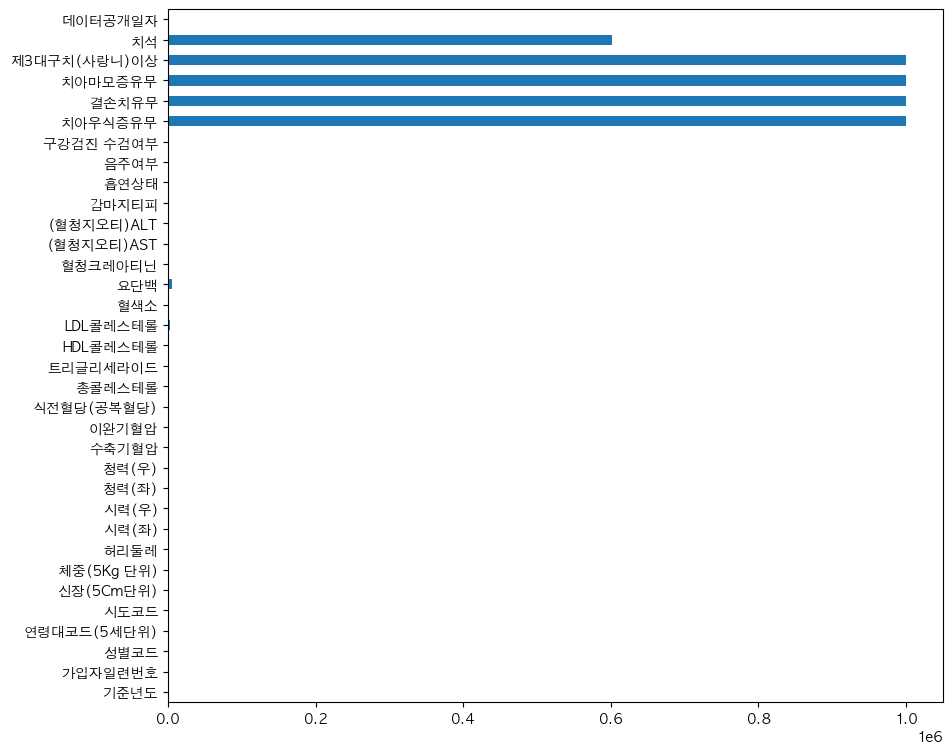

In [11]:
df.isna().sum().plot.barh(figsize=(10,9)) #글씨를 보기위해 가로막대사용

In [12]:
df[['(혈청지오티)ALT','(혈청지오티)AST']].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [13]:
df[['(혈청지오티)ALT','(혈청지오티)AST']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [14]:
df[['(혈청지오티)ALT','(혈청지오티)AST']].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


In [15]:
df['성별코드']

0         1
1         2
2         1
3         2
4         1
         ..
999995    2
999996    2
999997    2
999998    1
999999    2
Name: 성별코드, Length: 1000000, dtype: int64

In [16]:
df['성별코드'].value_counts()

성별코드
1    531172
2    468828
Name: count, dtype: int64

In [17]:
df['흡연상태'].value_counts() #2는 금연 중 3은 흡연 중 

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

#### groupby / 피봇 테이블

In [18]:
df.groupby(['성별코드'])['가입자일련번호'].count() #성별코드를 그룹바이 한 후 가입자 일려번호에 대해 평균을 구하기ㅠ

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [19]:
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(['성별코드','음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [21]:
df.groupby(['성별코드','음주여부'])['감마지티피'].describe() #극단 이상치가 있는 것을 확인할 수 있음

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [22]:
df.groupby(['성별코드','음주여부'])['감마지티피']\
.agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [23]:
df.pivot_table(index='음주여부',values='가입자일련번호',aggfunc='count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


#### 그룹바이는 속도가 빠르고 시리즈형태로 출력가능/  피벗 데이블은 느리지만 조금 더 직관적

In [24]:
pd.pivot_table(df,index='음주여부',values='감마지티피',\
               aggfunc=['mean','median'])  #기본값은 평균값으로 되어있음

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [25]:
pd.pivot_table(df,index=['음주여부','성별코드'],values='감마지티피',\
               aggfunc=['describe']) #groupby와 비교하면 같은 값이 나온 것을 확인할 수 있다.

describe                                                        
               25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                                 
0.0  1        18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2        13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1        24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2        13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

#### 전체 데이터 시각화 하기
100만개가 넘는 데이터를 시각화할 시에는 되도록 그룹바이와 피봇을 이용한다.
seaborn같은 고급 통계 연산은 느림

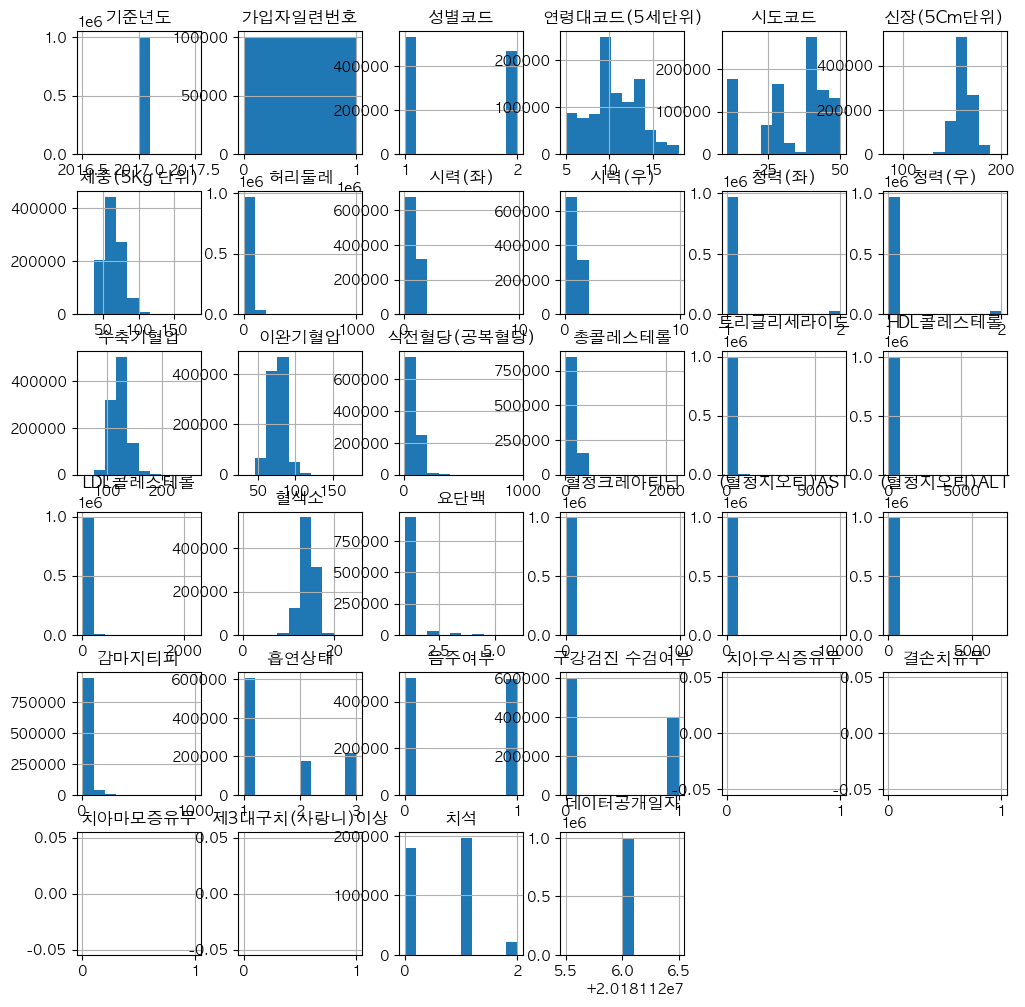

In [26]:
h=df.hist(figsize=(12,12))
plt.show()


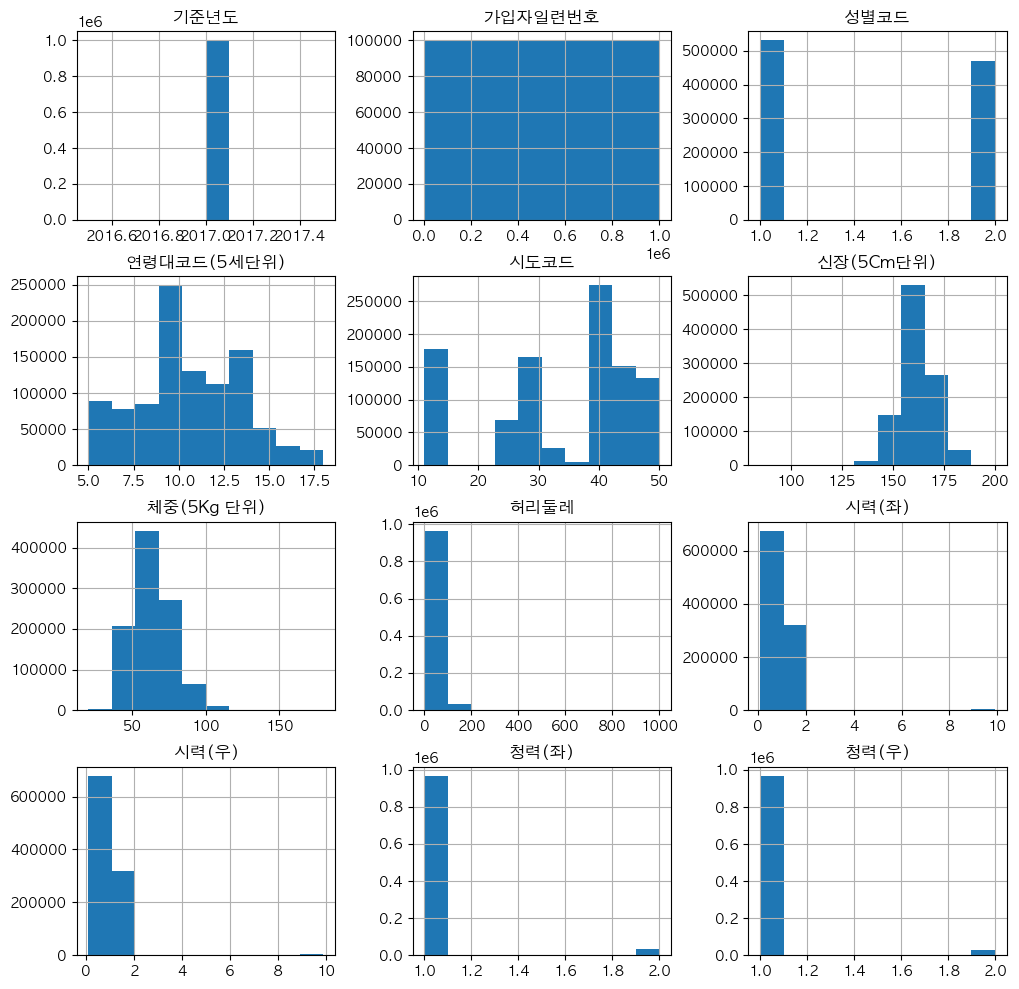

In [27]:
# 슬라이싱을 사용해 히스토그램 그리기 : 보고 싶은 데이터만 추출해서 보기
h=df.iloc[:,:12].hist(figsize=(12,12))

array([[<Axes: title={'center': '수축기혈압'}>,
        <Axes: title={'center': '이완기혈압'}>,
        <Axes: title={'center': '식전혈당(공복혈당)'}>],
       [<Axes: title={'center': '총콜레스테롤'}>,
        <Axes: title={'center': '트리글리세라이드'}>,
        <Axes: title={'center': 'HDL콜레스테롤'}>],
       [<Axes: title={'center': 'LDL콜레스테롤'}>,
        <Axes: title={'center': '혈색소'}>, <Axes: title={'center': '요단백'}>],
       [<Axes: title={'center': '혈청크레아티닌'}>,
        <Axes: title={'center': '(혈청지오티)AST'}>,
        <Axes: title={'center': '(혈청지오티)ALT'}>]], dtype=object)

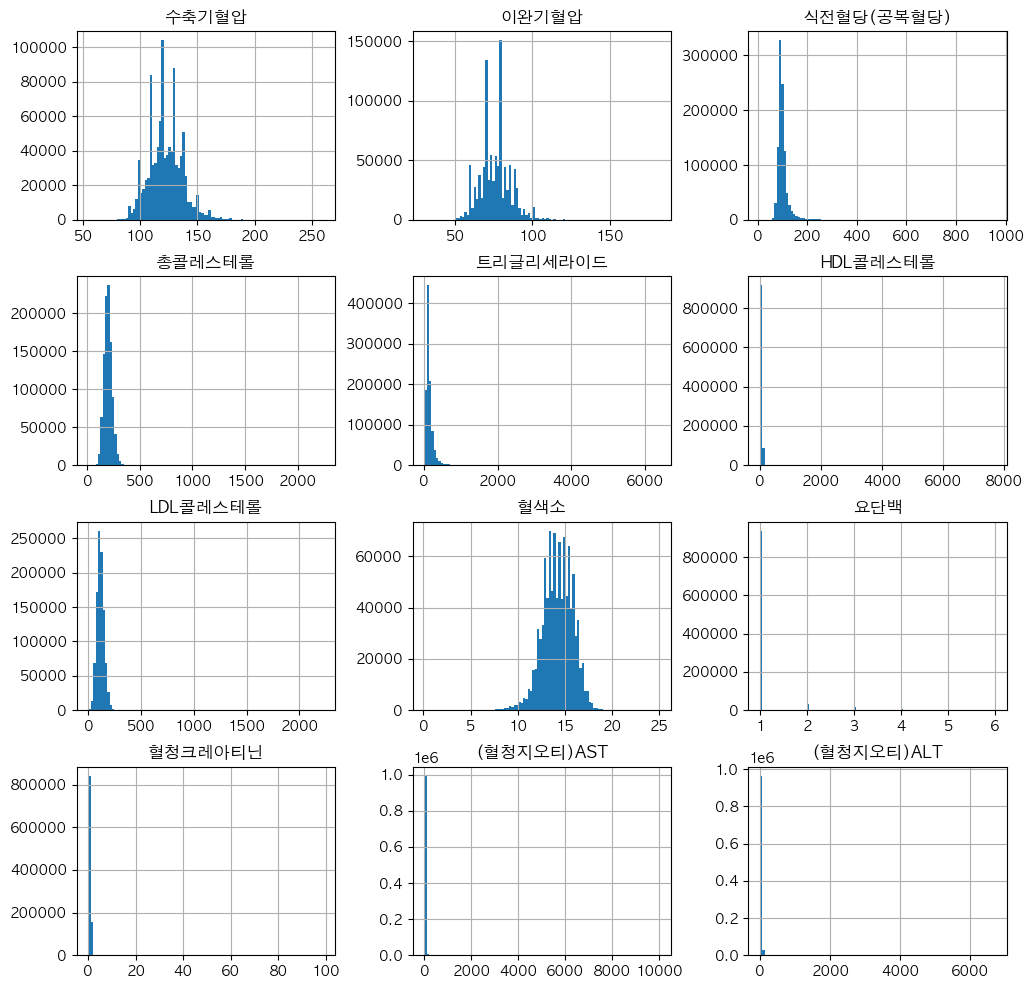

In [28]:
h=df.iloc[:,12:24].hist(figsize=(12,12),bins=100) #bins=막대의 개수
h

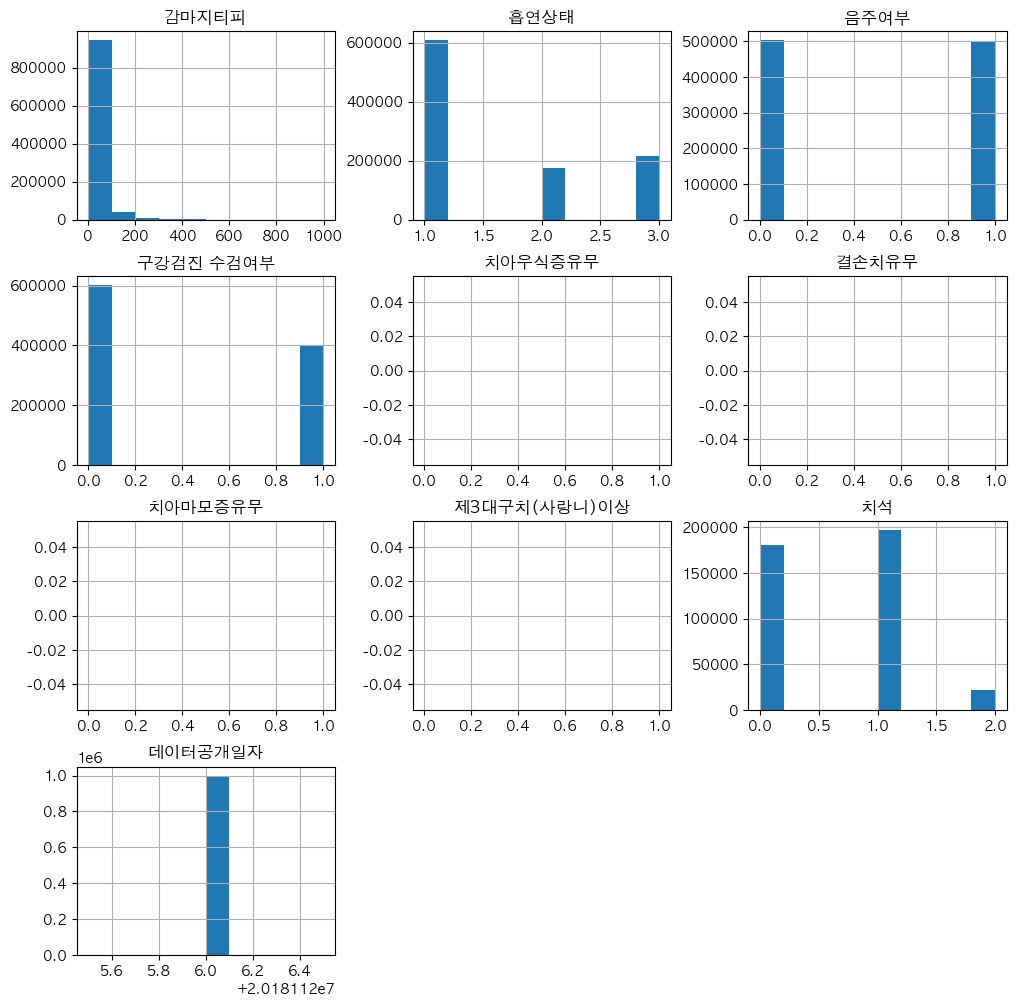

In [29]:
h=df.iloc[:,24:].hist(figsize=(12,12),bins=10)

In [53]:
df_sample=df.sample(1000,random_state=1) # 항상 같은 값을 반환하는 random_State
df_sample
#print(df_sample.shape)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,1.0,...,35.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,0.4,...,19.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,0.4,...,15.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,0.3,...,13.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,0.8,...,265.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,11,29,155.0,50.0,65.1,1.0,0.8,...,22.0,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
875389,2017,875390,2,9,11,155.0,45.0,66.5,0.9,0.8,...,12.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
358458,2017,358459,2,11,11,160.0,50.0,72.0,0.9,0.8,...,11.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
808228,2017,808229,1,9,48,175.0,65.0,75.2,1.2,1.2,...,122.0,3.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


<Axes: xlabel='음주여부'>

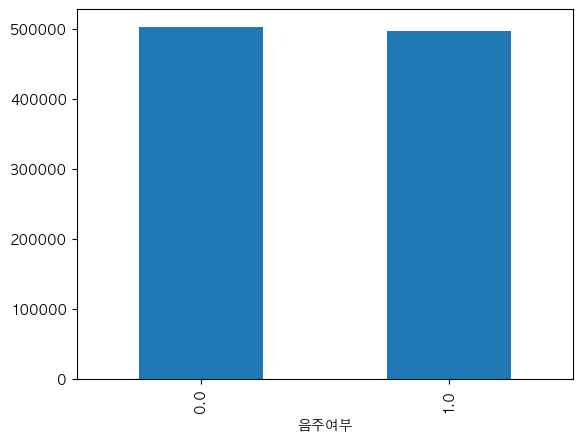

In [31]:
df['음주여부'].value_counts().plot.bar() #빈도 수 구하기

<Axes: xlabel='음주여부', ylabel='count'>

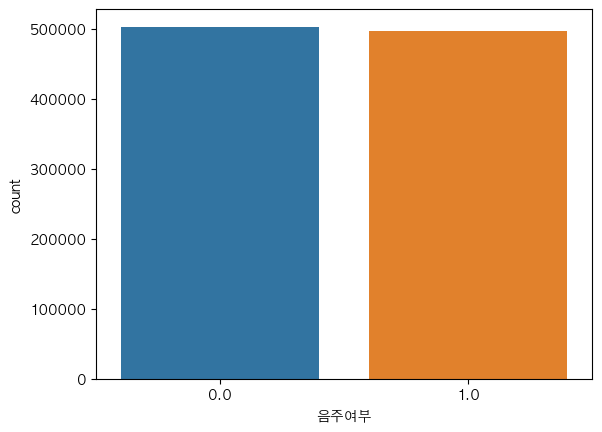

In [32]:
sns.countplot(x='음주여부',data=df)

<Axes: xlabel='음주여부', ylabel='count'>

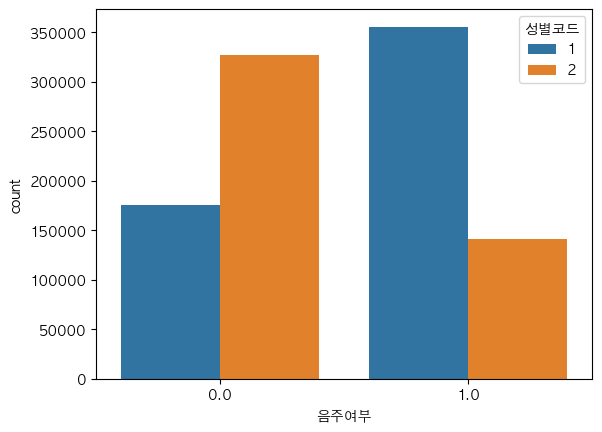

In [33]:
sns.countplot(data=df,x='음주여부',hue='성별코드')

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

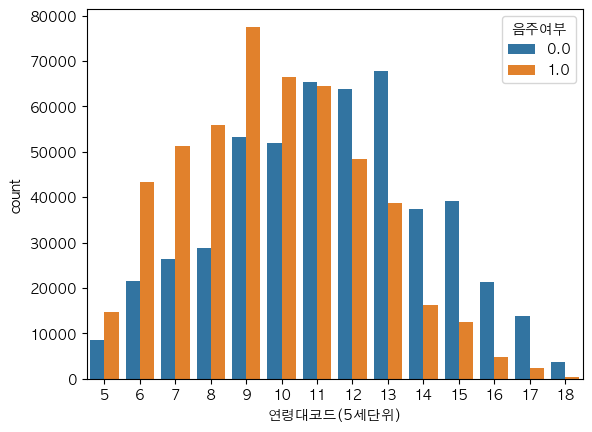

In [34]:
sns.countplot(data=df,x='연령대코드(5세단위)',hue='음주여부') #카테고리형태 그래프

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

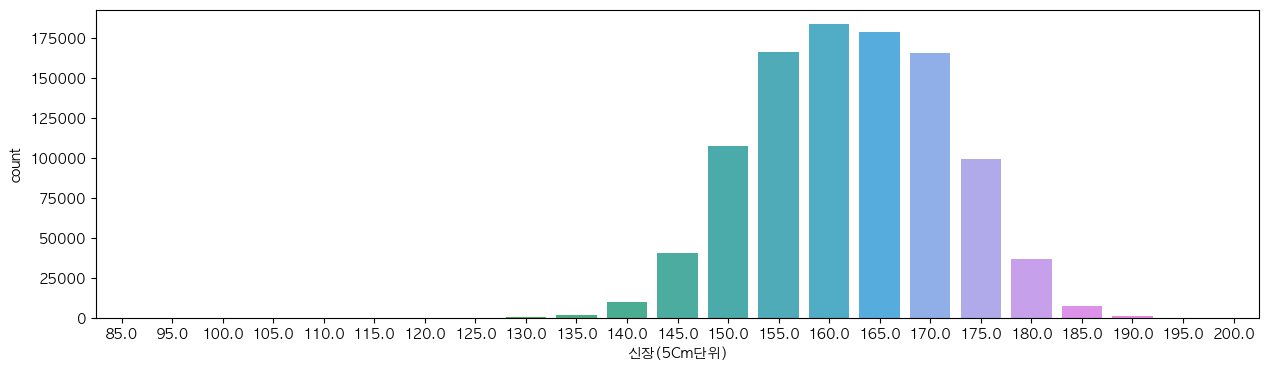

In [35]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='신장(5Cm단위)')

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

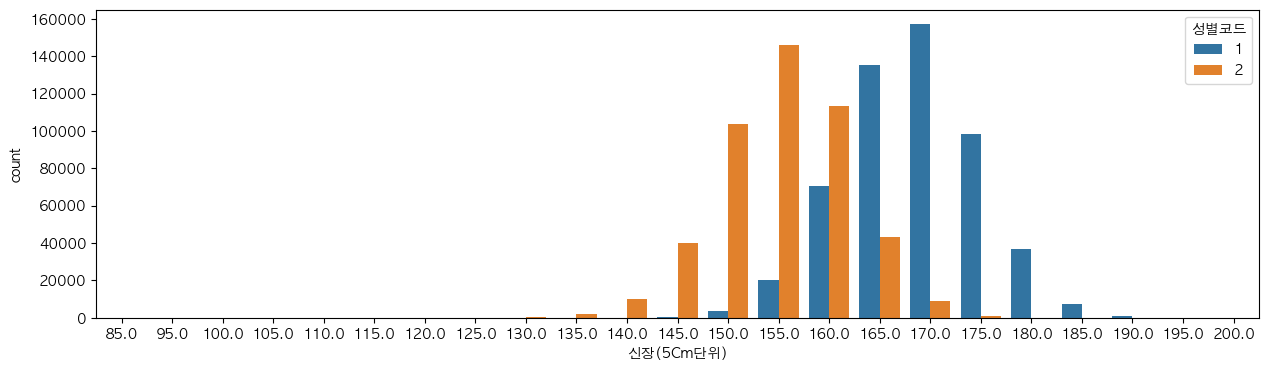

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='신장(5Cm단위)',hue='성별코드')

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

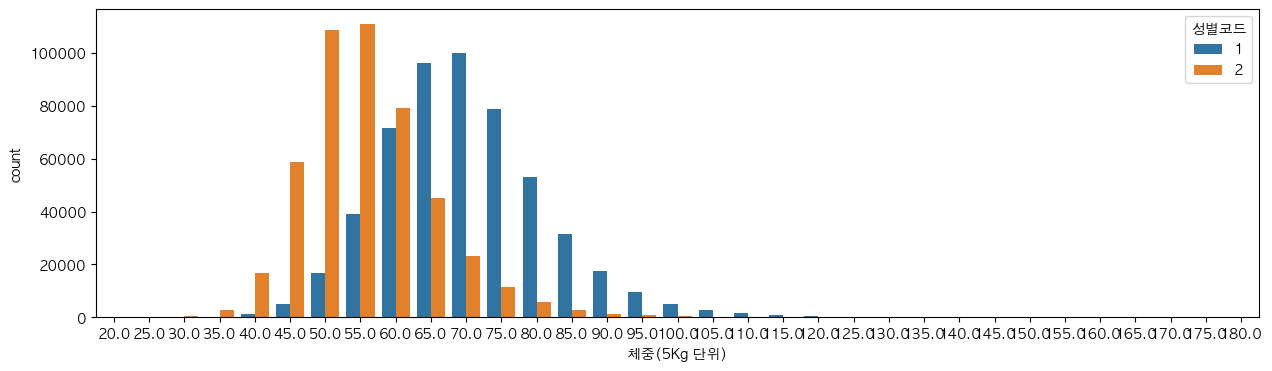

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='체중(5Kg 단위)',hue='성별코드')  #hue는 hue saturation

In [38]:
df_sample

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,1.0,...,35.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,0.4,...,19.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,0.4,...,15.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,0.3,...,13.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,0.8,...,265.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

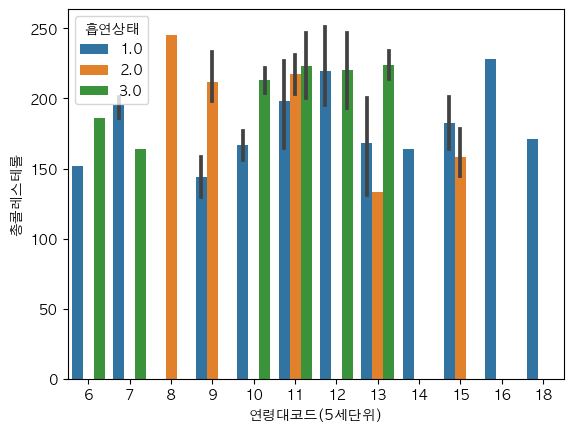

In [41]:
#plt.figure(figsize=(15,4))
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='총콜레스테롤',hue='흡연상태')
#100만개의 데이터를 그리기 때문에 매우 느린것을 확인할 수 있음

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/726145539.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부',ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

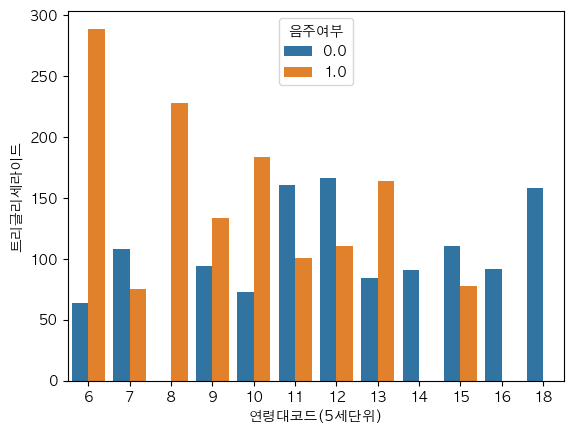

In [48]:
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부',ci=None) 
#ci는 신뢰수준을 보여줌 기본값은 95%

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/3103132041.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue='성별코드',ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

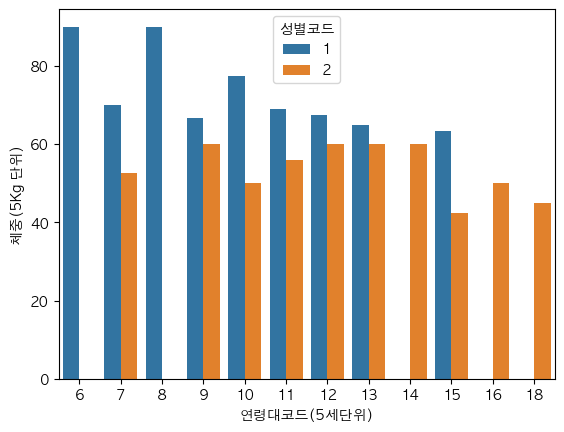

In [49]:
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue='성별코드',ci=None) 

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/2910181379.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue='성별코드',ci='sd')


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

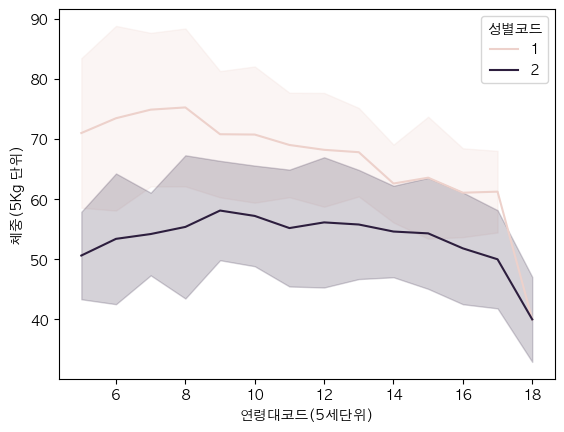

In [54]:
sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue='성별코드',ci='sd') 

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/1862834829.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='성별코드',ci='sd')


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

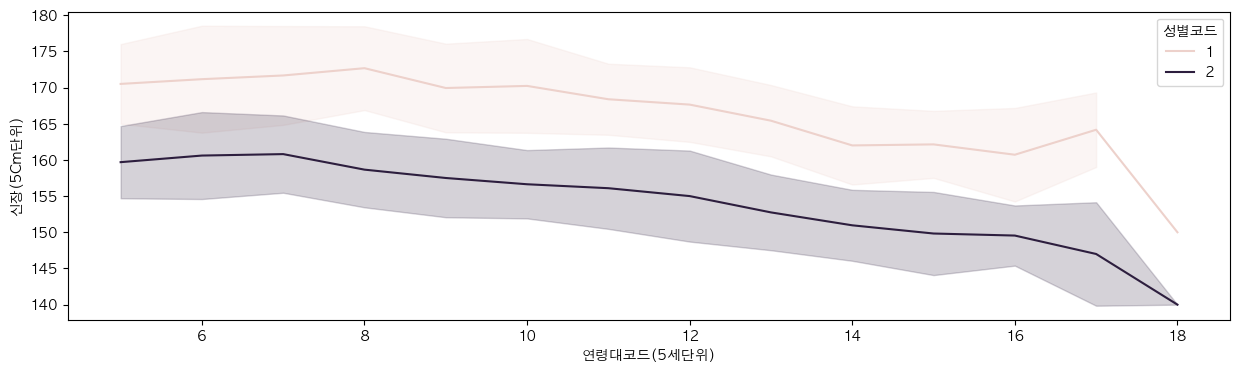

In [58]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='성별코드',ci='sd') 

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/3971622689.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')
/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/3971622689.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

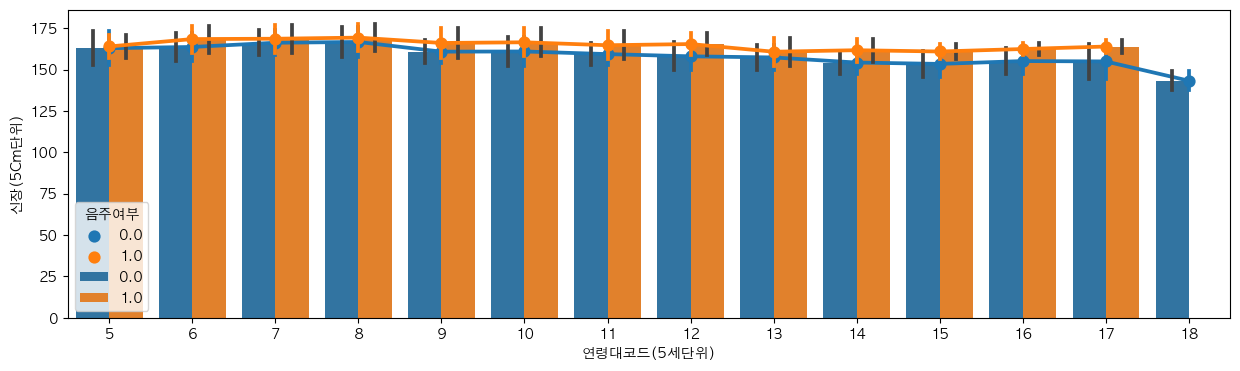

In [62]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')
sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')

#barplot과 pointplot 겹처그리기

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/2839815570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

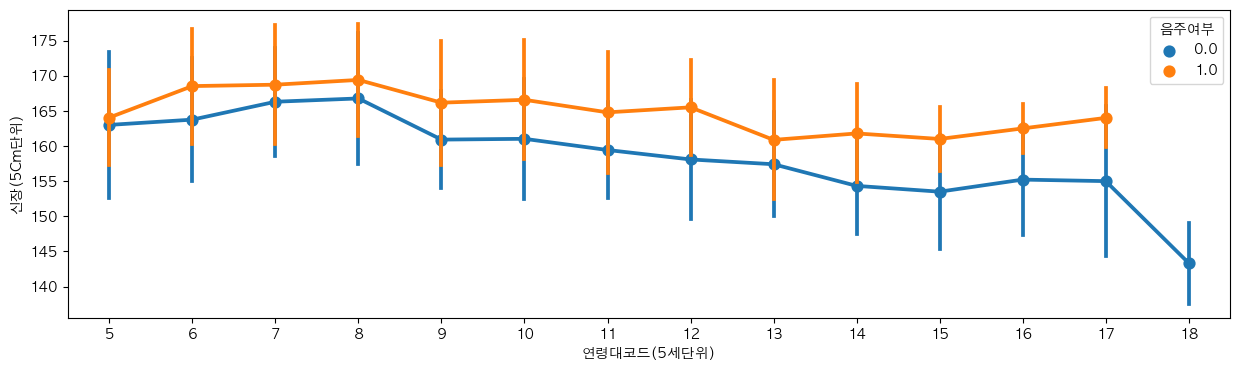

In [64]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/3079003080.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='연령대코드(5세단위)',y='혈색소',hue='음주여부',ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

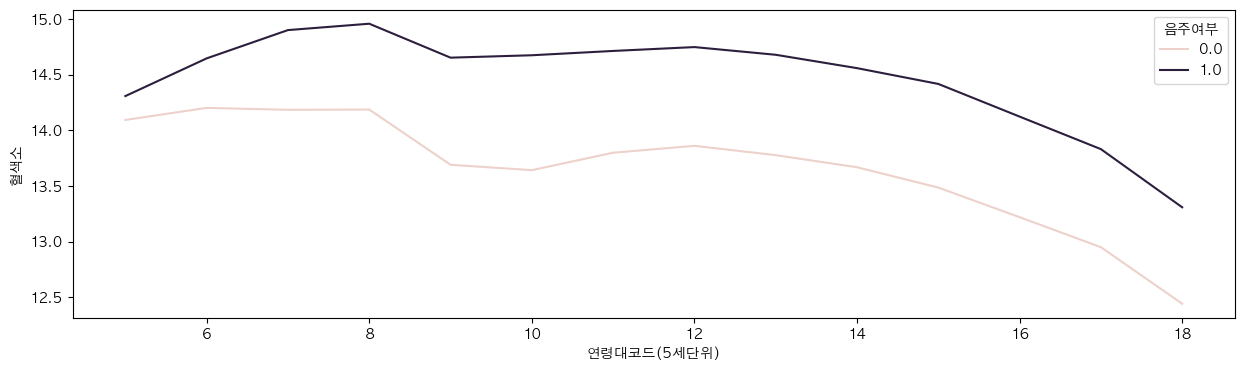

In [68]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df,x='연령대코드(5세단위)',y='혈색소',hue='음주여부',ci=None)

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

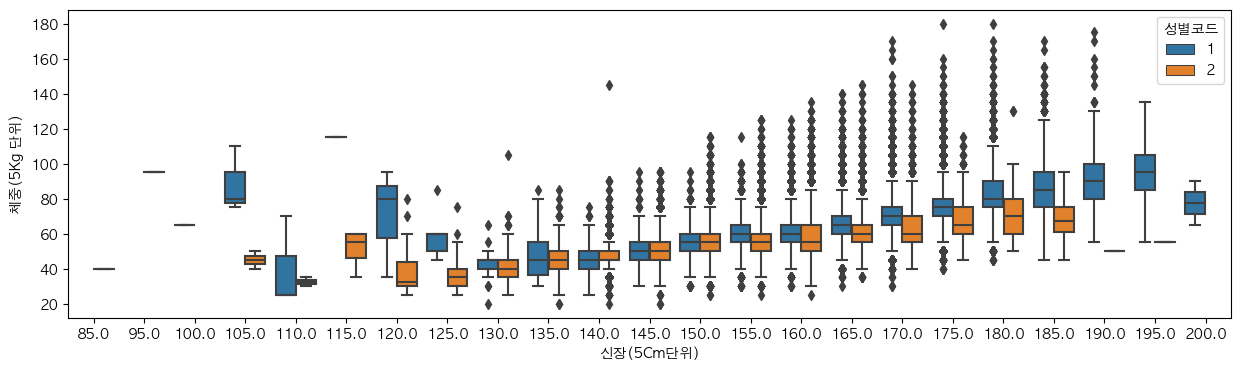

In [75]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='성별코드')

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

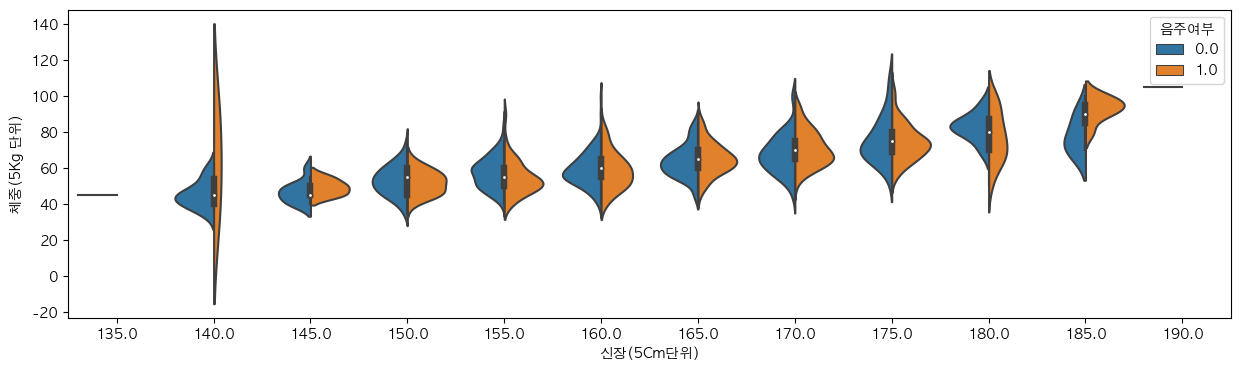

In [86]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='음주여부',split=True)
#split 기능을 통해 더 자세히 보기 가능
#바이올린 플랏은 박스플랏의 단점을 보완한 것  / 

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

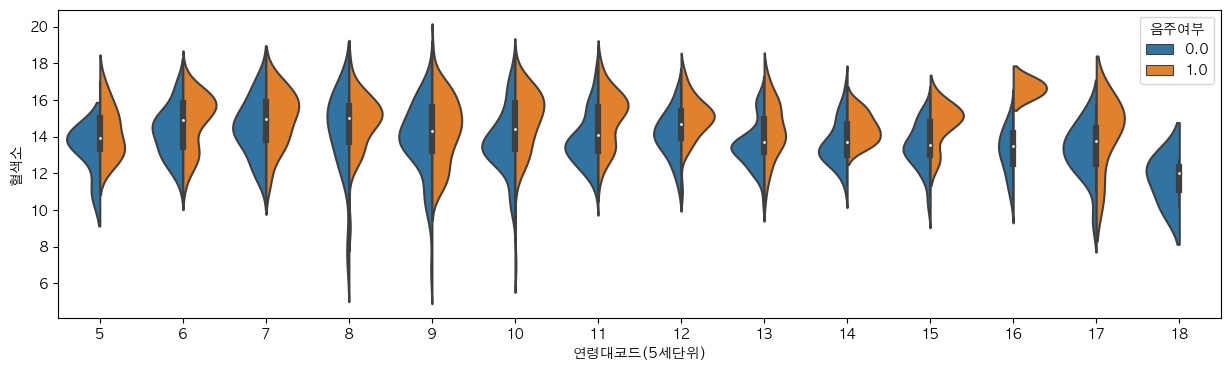

In [87]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x='연령대코드(5세단위)',y='혈색소',hue='음주여부',split=True)

#하얀값은 미디언 검저앖은 박스플랏을 의미

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/

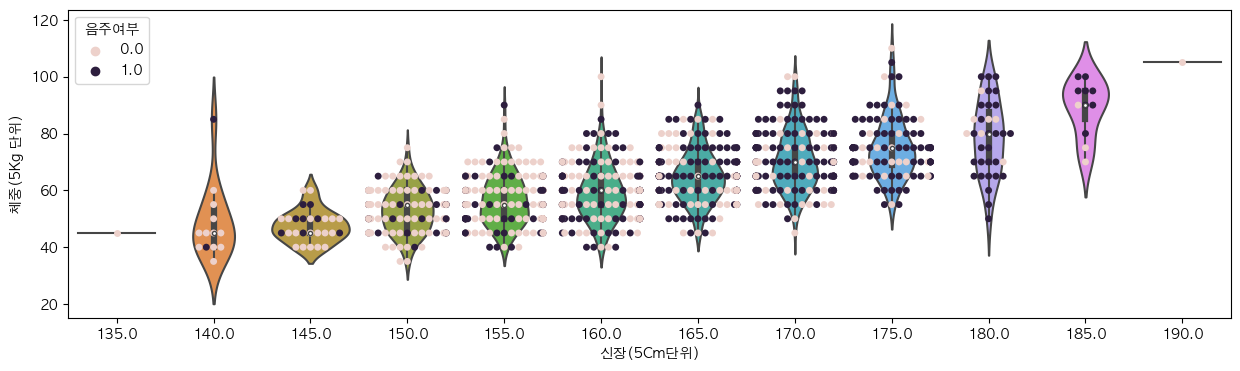

In [91]:
plt.show()
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='음주여부')
sns.violinplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)')

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


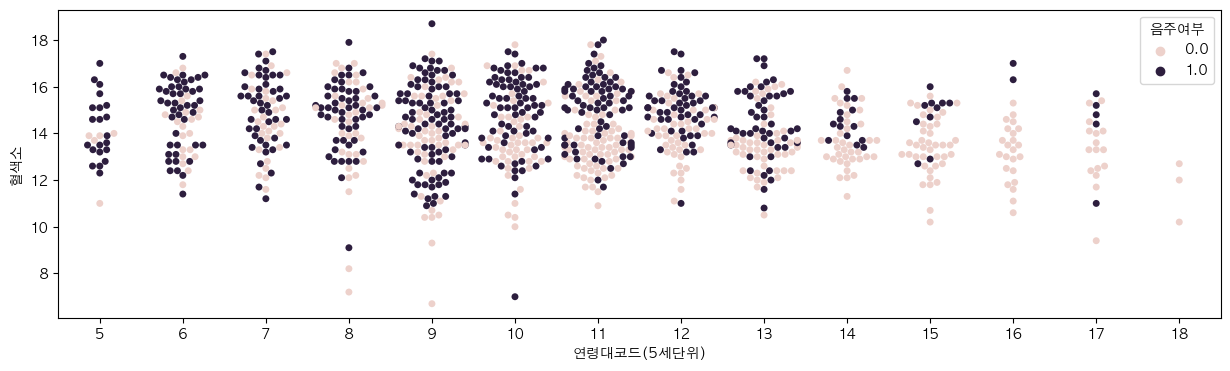

In [94]:

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x='연령대코드(5세단위)',y='혈색소',hue='음주여부')

<Figure size 1500x400 with 0 Axes>

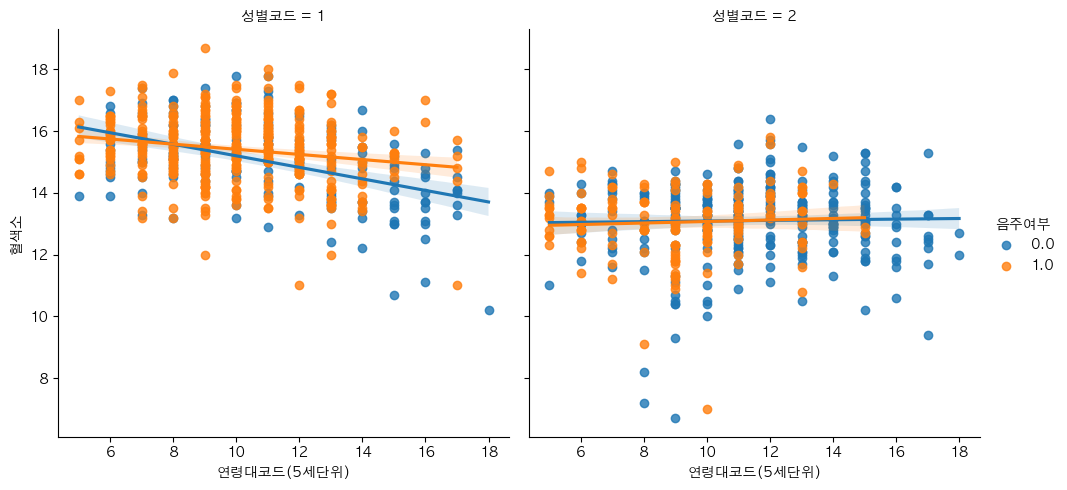

In [99]:
plt.figure(figsize=(15,4))
sns.lmplot(data=df_sample,x='연령대코드(5세단위)',y='혈색소',hue='음주여부',col='성별코드')
#col을 이용해서 값을 분류할 수 있다는 것이 장점임
#한주에 많은 컬럼을 확인할 수 있다는 것이 장점  = 다변수 시각화

#### 수치형 데이터 시각화

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

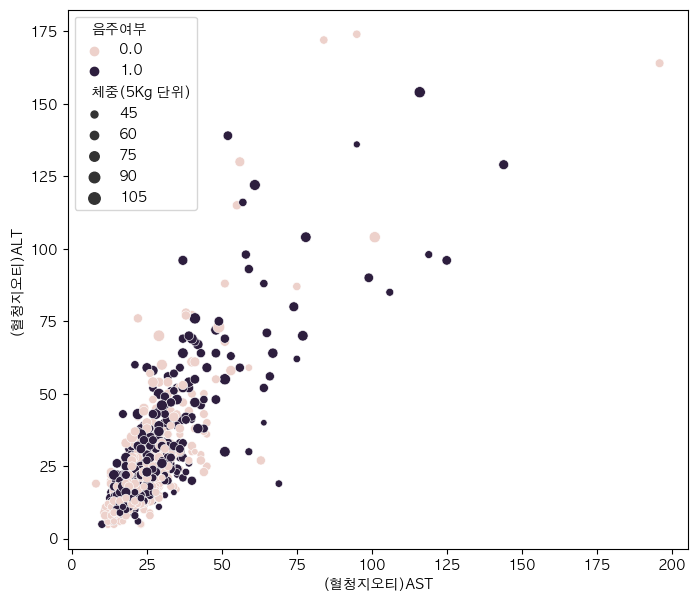

In [107]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample,x='(혈청지오티)AST',y='(혈청지오티)ALT',\
                hue='음주여부',size='체중(5Kg 단위)')
#size를 통해 데이터 분류 가능
#이상치를 파악하기에 용이함

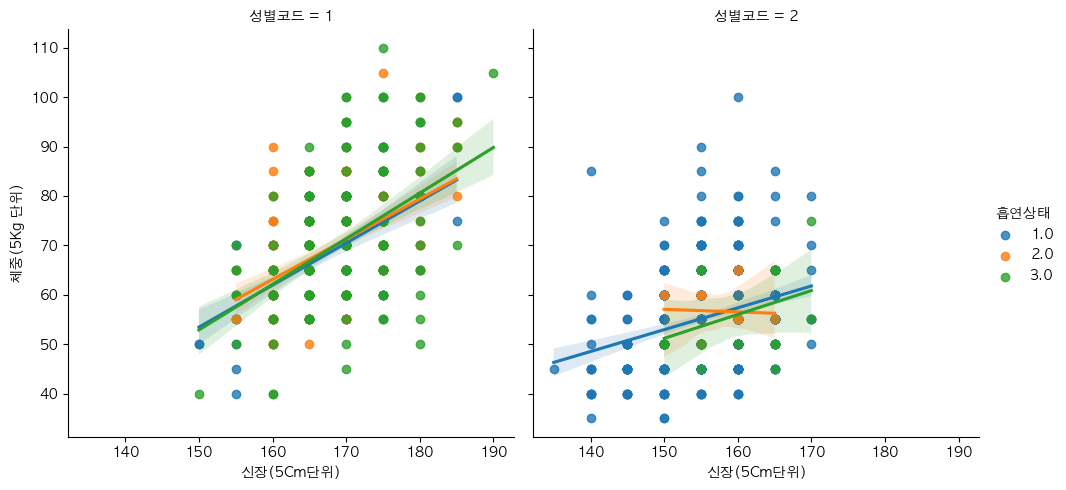

In [117]:
sns.lmplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)',\
                hue='흡연상태',col='성별코드')
#신장과 체중은 사오간관계가 있다

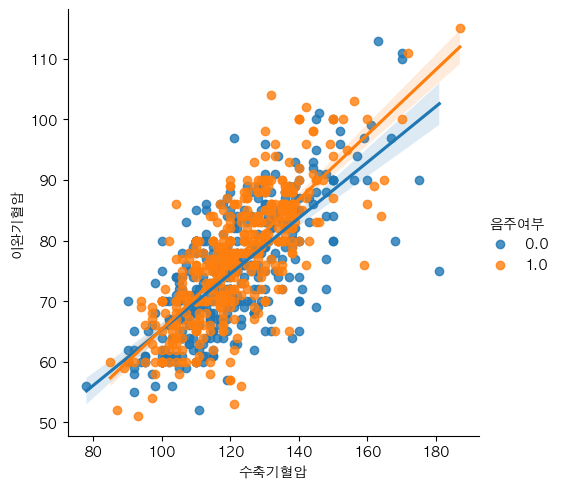

In [119]:
sns.lmplot(data=df_sample,x='수축기혈압',y='이완기혈압',hue='음주여부')
#양의 상관관계

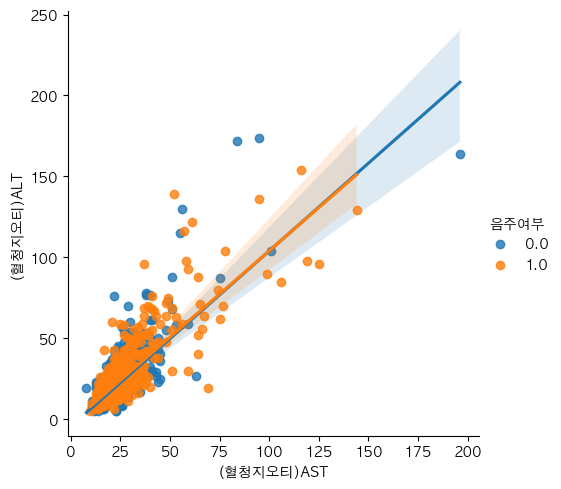

In [122]:
sns.lmplot(data=df_sample,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',robust=True)
#ㅠrobust는 이상치를 제거해서 볼 수 있음

In [150]:
df_ASLT=df_sample[(df_sample['(혈청지오티)AST']<200) & (df_sample['(혈청지오티)ALT']<200)]
#이상치가 제거된 데이터로 변함

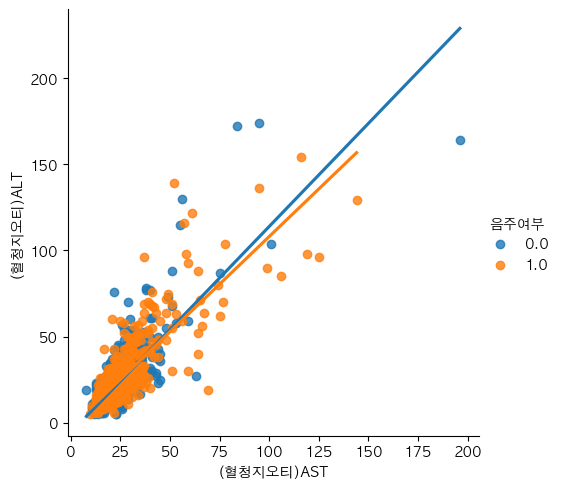

In [151]:
sns.lmplot(data=df_ASLT,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',ci=None)

#ci값을 논으로 지정하면 데이터가 빨리 그려짐

In [153]:
df_ASLT_high=df_sample[(df_sample['(혈청지오티)AST']>400) | (df_sample['(혈청지오티)ALT']>400)]

In [154]:
# sns.lmplot(data=sns.lmplot(data=df_ASLT,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',ci=None)
# ,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',ci=None)
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자


In [157]:
df_ASLT_high=df_ASLT_high[df_ASLT_high['(혈청지오티)AST']>8000]
df_ASLT_high.iloc[:,4:27]

,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부


### displot 으로 히스토그램 그리기

In [159]:
df.columns #수치형데이터 파악

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [164]:
df_chol=df.loc[df['총콜레스테롤'].notnull(),'총콜레스테롤']
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/3525131221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol,bins=10) #얼마나 뾰쪽한지ㅣ/ 치우쳐 졌는지 볼 수 있음


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

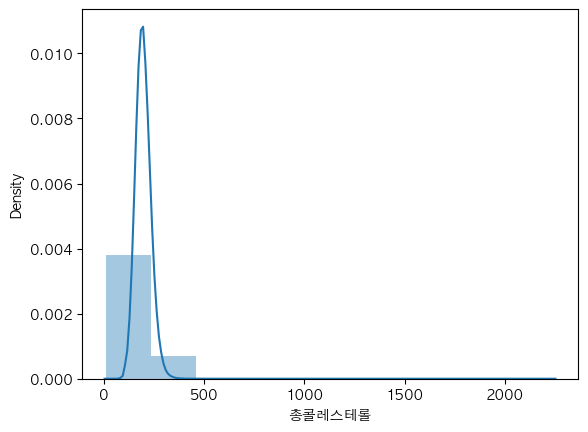

In [167]:
sns.distplot(df_chol,bins=1b0) #얼마나 뾰쪽한지ㅣ/ 치우쳐 졌는지 볼 수 있음

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/413036346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==1),'총콜레스테롤'])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

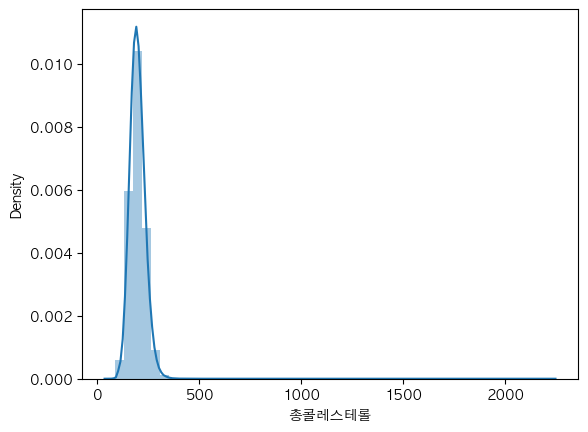

In [171]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==1),'총콜레스테롤'])

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_98620/4024612862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==0),'총콜레스테롤'])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

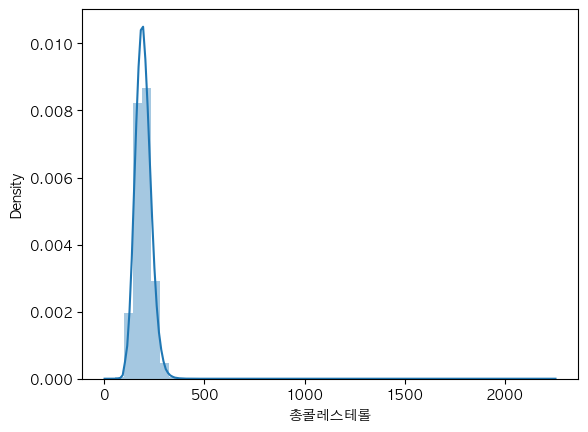

In [172]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==0),'총콜레스테롤'])

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

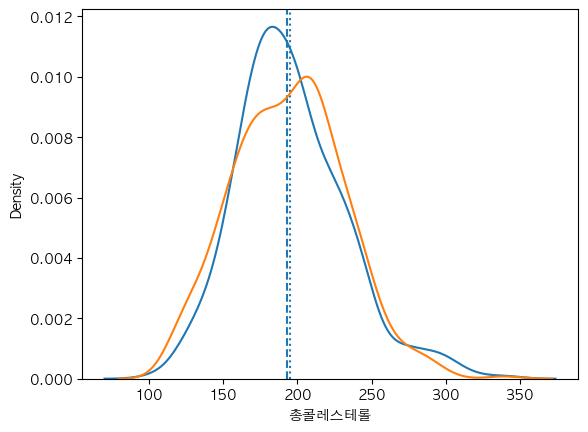

In [182]:
plt.axvline(df_sample['총콜레스테롤'].mean(),ls=':')
plt.axvline(df_sample['총콜레스테롤'].median(),ls='--')
sns.kdeplot(df_sample.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==1),'총콜레스테롤'],label='음주 중')
sns.kdeplot(df_sample.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==0),'총콜레스테롤'],label='음주 안 함')

<Axes: xlabel='감마지티피', ylabel='Density'>

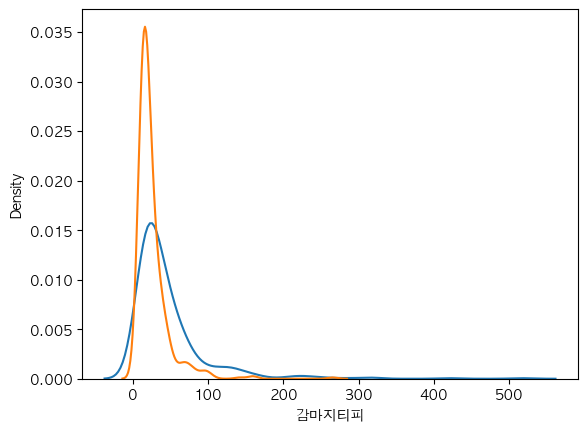

In [187]:
s_1=df_sample.loc[df_sample['음주여부']==1,'감마지티피']
s_0=df_sample.loc[df_sample['음주여부']==0,'감마지티피']
sns.kdeplot(s_1,label='음주 중')
sns.kdeplot(s_0,label='음주 안함')

In [195]:
columns=['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자']


In [202]:
df_small=df_sample[columns]
df_corr=df_small.corr()

In [205]:
df_corr.loc[df_corr['신장(5Cm단위)']>0.3,'신장(5Cm단위)']

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [206]:
df_corr.loc[df_corr['음주여부']>0.1,'음주여부']

신장(5Cm단위)     0.362905
체중(5Kg 단위)    0.235974
이완기혈압         0.110143
트리글리세라이드      0.103018
혈색소           0.291863
감마지티피         0.250011
흡연상태          0.365642
음주여부          1.000000
Name: 음주여부, dtype: float64

In [208]:
df_corr['혈색소'].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
흡연상태          0.460010
허리둘레          0.377023
(혈청지오티)ALT    0.294575
음주여부          0.291863
Name: 혈색소, dtype: float64

In [210]:
df_corr['감마지티피'].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.525509
(혈청지오티)ALT    0.514197
트리글리세라이드      0.335514
흡연상태          0.305811
식전혈당(공복혈당)    0.292087
허리둘레          0.271566
Name: 감마지티피, dtype: float64

<Axes: >

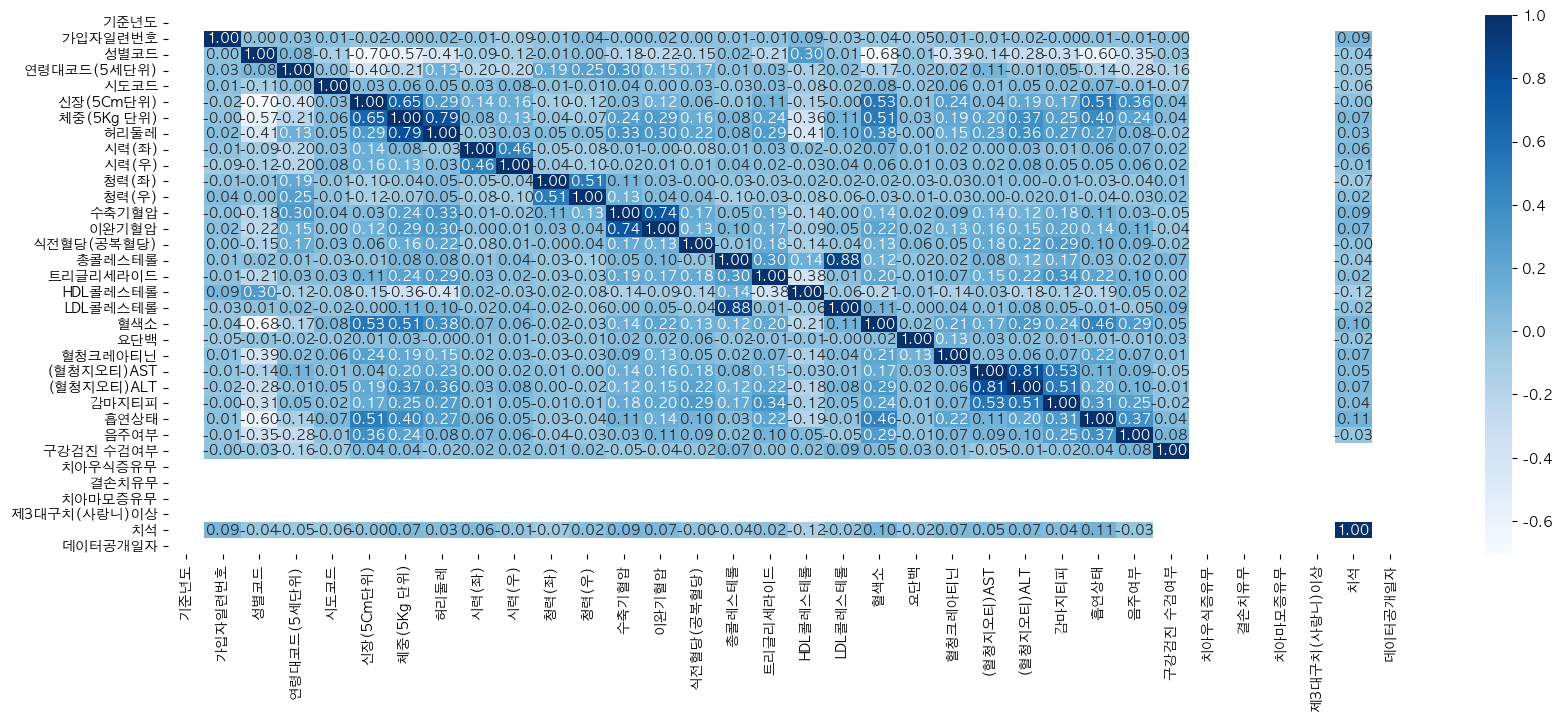

In [219]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='Blues') #fmt 는 소수점 설정
 #상관관계가 높을수록 진하게 설정

<Axes: >

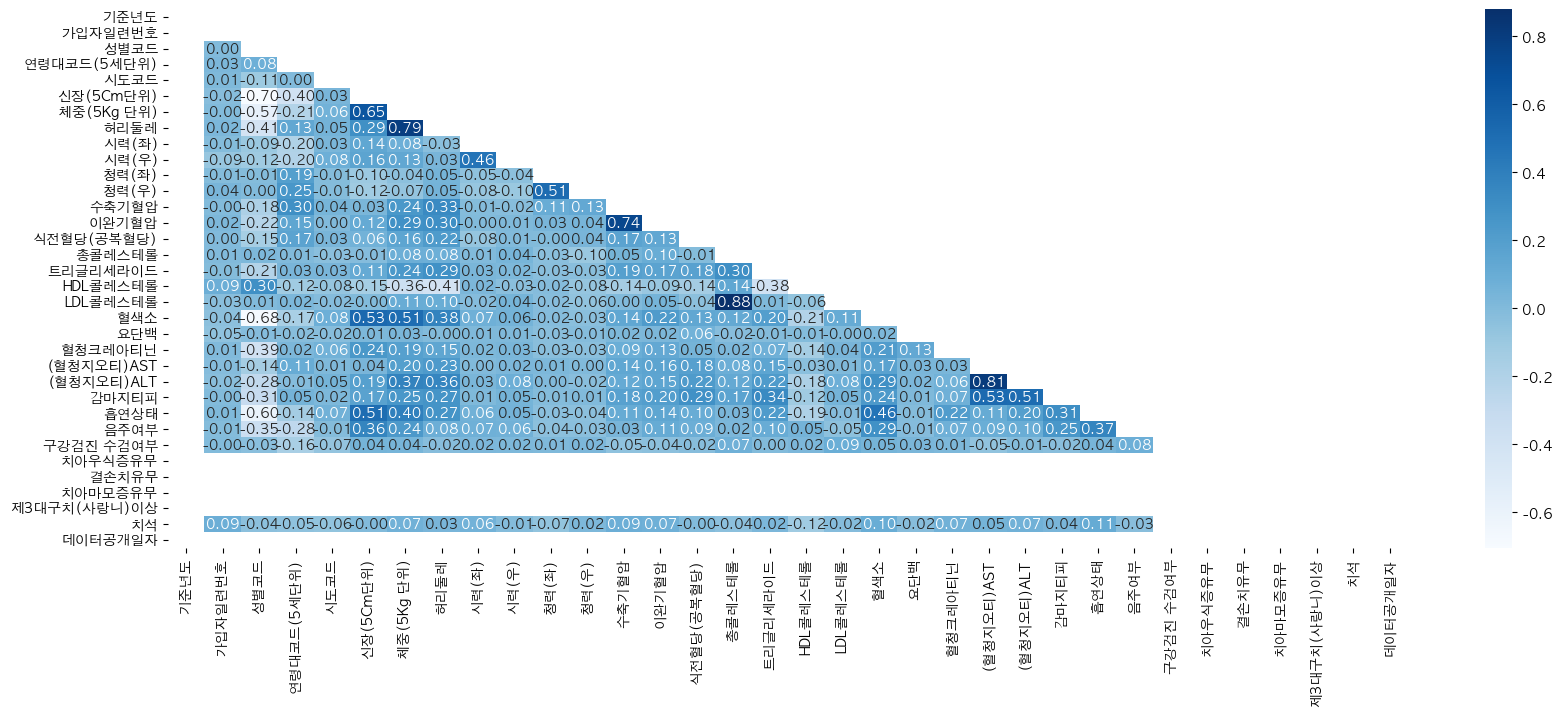

In [226]:
mask=np.triu(np.ones_like(df_corr,dtype=np.bool_))
mask
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='Blues',mask=mask)